In [12]:
import os, warnings
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, RandomContrast, RandomFlip,  RandomRotation, RandomTranslation
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [13]:
x_train = pd.read_csv("Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv",header=None)
x_test = pd.read_csv("Arabic Handwritten Characters Dataset CSV/csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv("Arabic Handwritten Characters Dataset CSV/csvTestLabel 3360x1.csv",header=None)

In [14]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(13440, 1024) (13440, 1) (3360, 1024) (3360, 1)


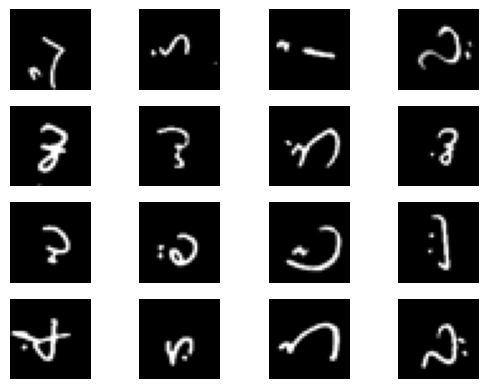

In [15]:
random_letters = x_train.sample(16)

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(random_letters.iloc[i].values.reshape(32,32).astype(np.uint8), cmap='gray')
    plt.axis('off')

In [16]:
x_train = np.array(x_train).reshape(-1, 32, 32, 1)
x_test = np.array(x_test).reshape(-1, 32, 32, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
print(f"x_train shape: {x_train.shape} \ny_train shape: {y_train.shape} \nx_test shape: {x_test.shape} \ny_test shape: {y_test.shape}")

x_train shape: (13440, 32, 32, 1) 
y_train shape: (13440, 29) 
x_test shape: (3360, 32, 32, 1) 
y_test shape: (3360, 29)


In [18]:
y_train = y_train[:,1:]
y_test = y_test[:,1:]

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data = train_datagen.flow(x_train, y_train, batch_size=32)

val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow(x_test, y_test, batch_size=32)

In [27]:
def model():
    input = Input(shape=(32, 32, 1))
    x = Conv2D(32, (3, 3), activation='relu')(input)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(28, activation='softmax')(x)

    model = Model(input, output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [28]:
model_checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy', mode='min', verbose=1, save_best_only=True)

In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

In [30]:
datagen = ImageDataGenerator(
        brightness_range = (0.5, 1.5), # Randomly adjusts image brightness within a specified range 
        rotation_range=20,  # Randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # Randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # Randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # Randomly flip images
        vertical_flip = True)  # Randomly flip images

In [31]:
train_gen = ImageDataGenerator(rescale = 1./255.,
                              rotation_range= 40,
                              shear_range=0.2,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              fill_mode='nearest',
                              horizontal_flip=True)
train_data_gen = train_gen.flow(x_train  , y_train , batch_size = 50)

In [32]:
validation_gen = ImageDataGenerator(rescale = 1./255.)
validation_data_gen = validation_gen.flow(x_test , y_test , batch_size = 5)

In [33]:
classifier = model()
history = classifier.fit(train_data_gen, epochs=50, validation_data=validation_data_gen, callbacks=[model_checkpoint, early_stopping])

Epoch 1/50


I0000 00:00:1733250229.773440   35617 service.cc:148] XLA service 0x7f1e40007f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733250229.773530   35617 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-12-03 21:23:49.799882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733250229.963473   35617 cuda_dnn.cc:529] Loaded cuDNN version 90300


 13/269 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0279 - loss: 3.3330

I0000 00:00:1733250233.041114   35617 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


266/269 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0485 - loss: 3.2933
Epoch 1: val_accuracy improved from inf to 0.21667, saving model to best_model.keras
269/269 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.0488 - loss: 3.2920 - val_accuracy: 0.2167 - val_loss: 2.6415
Epoch 2/50
268/269 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1434 - loss: 2.7910
Epoch 2: val_accuracy did not improve from 0.21667
269/269 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.1436 - loss: 2.7900 - val_accuracy: 0.3196 - val_loss: 1.9915
Epoch 3/50
267/269 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2426 - loss: 2.3377
Epoch 3: val_accuracy did not improve from 0.21667
269/269 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.2427 - loss: 2.3371 - val_accuracy: 0.3235 - val_loss: 1.9166
Epoch 4/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3025 - loss: 2.1130
Epoch 4: val_accuracy did not improve from 0.21667
269/269 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.3026 - loss: 2

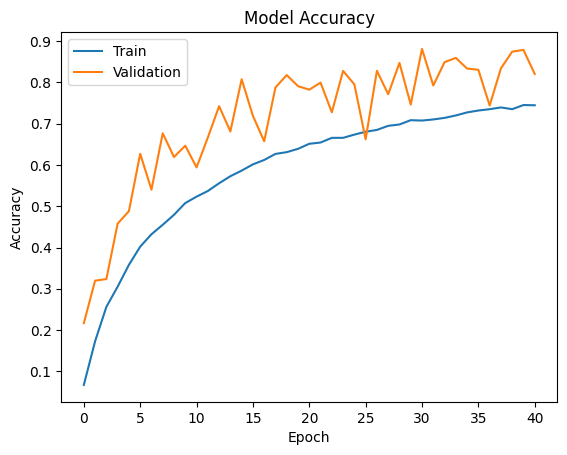

Text(0.5, 0, 'Epoch')

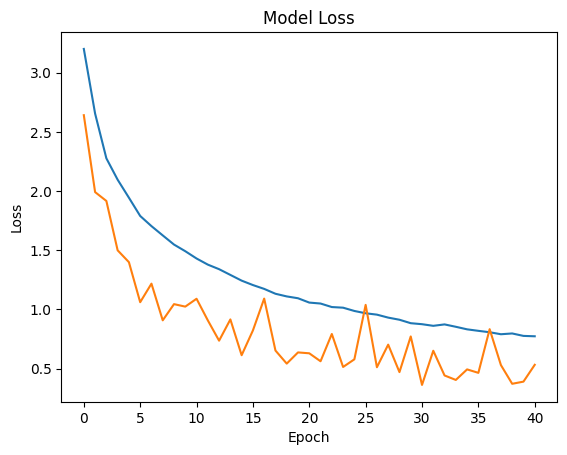

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')